In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv('Dataset 2.csv')
## print shape of dataset with rows and columns
print(dataset.shape)

(40964, 30)


In [3]:
## print the top5 records
dataset.head()

,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,20081459,JVHGLD4AS0,8/10/2020 2:25,1081,869,680,1125,10750.0,69.81,34,...,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001,346,294,42
1,20097626,JVHGLD4AS0,9/14/2020 2:30,1070,838,662,1245,10640.0,68.63,34,...,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001,365,299,42
2,20097722,JVHCM30A00,9/14/2020 6:47,1075,882,611,1040,10750.0,66.08,36,...,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001,730,575,21
3,20098318,JVHST01C00,9/15/2020 11:55,1088,864,603,1260,9000.0,51.94,38,...,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001,495,397,30
4,20098589,JVHWT02A00,9/16/2020 1:14,1061,848,650,1265,9811.0,61.23,35,...,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001,379,326,41


In [4]:
dataset.isna()

,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
pd.DataFrame((dataset.isna().sum()/dataset.isna().count()).sort_values(ascending=False)).head(100)

,0
COIL_ID,0.0
GRADE,0.0
YS,0.0
UTS,0.0
V,0.0
TI,0.0
SI,0.0
S,0.0
P,0.0
NI,0.0


# Numerical Variables

In [6]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  28


,COIL_ID,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,FM_EXIT_THIK,AL,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,20081459,1081,869,680,1125,10750.0,69.81,34,1.99,0.048,...,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001,346,294,42
1,20097626,1070,838,662,1245,10640.0,68.63,34,2.05,0.051,...,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001,365,299,42
2,20097722,1075,882,611,1040,10750.0,66.08,36,2.49,0.032,...,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001,730,575,21
3,20098318,1088,864,603,1260,9000.0,51.94,38,4.99,0.053,...,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001,495,397,30
4,20098589,1061,848,650,1265,9811.0,61.23,35,2.31,0.051,...,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001,379,326,41


# Continuous Variable¶

In [7]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<10 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [8]:
discrete_feature

[]

In [9]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 28


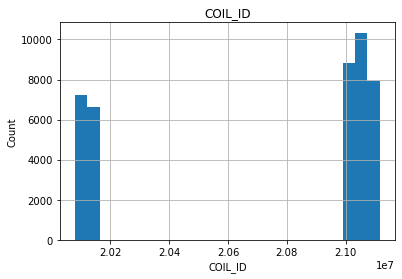

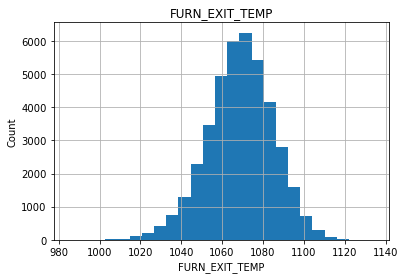

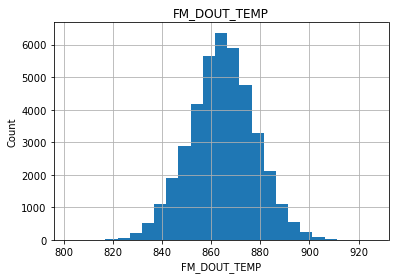

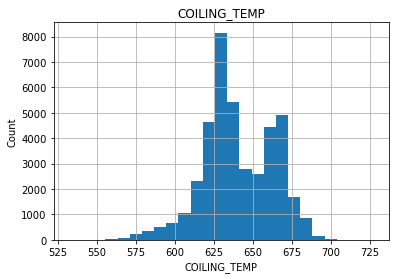

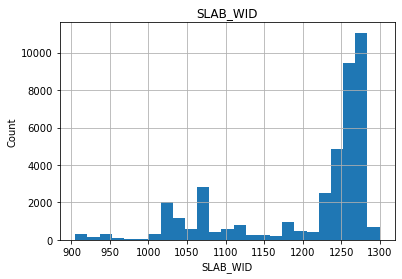

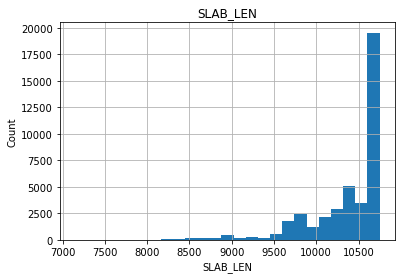

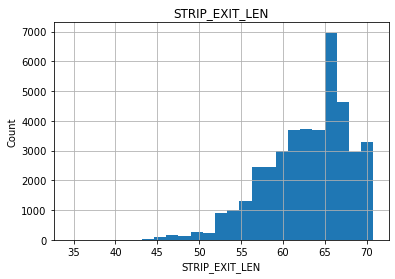

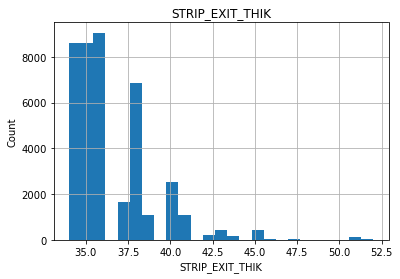

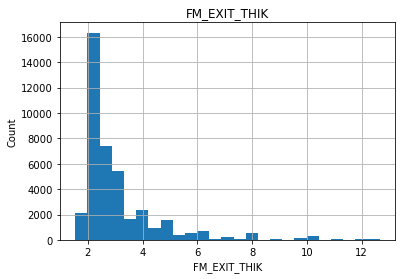

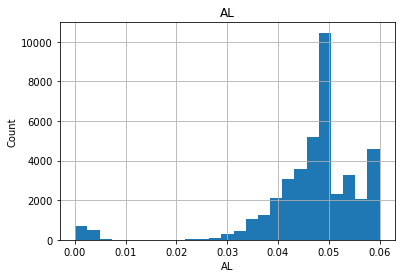

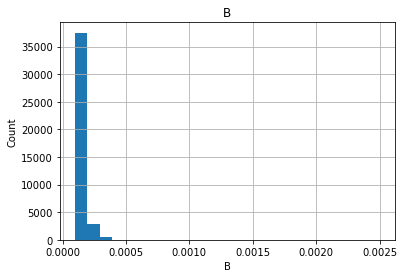

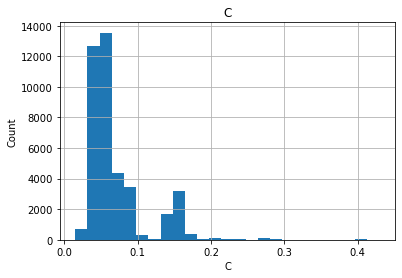

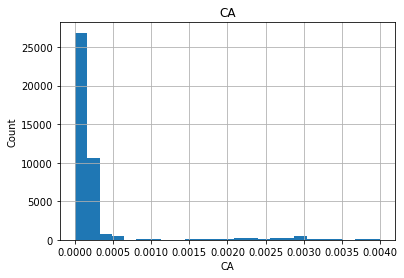

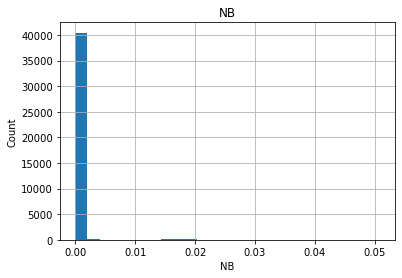

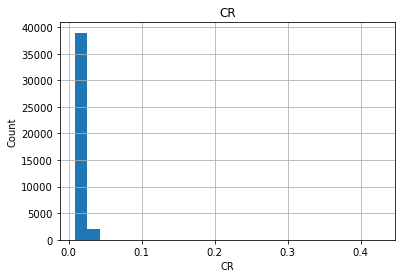

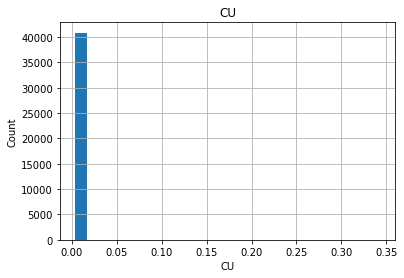

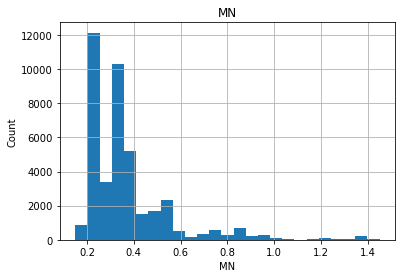

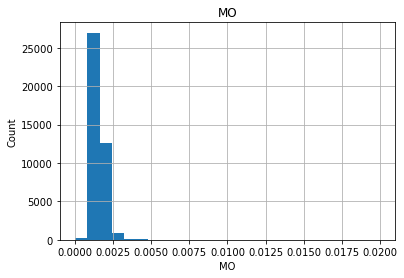

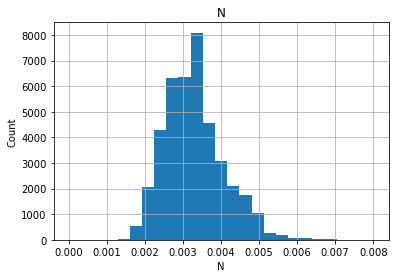

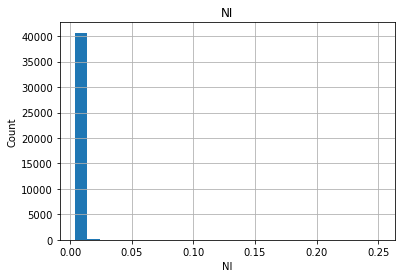

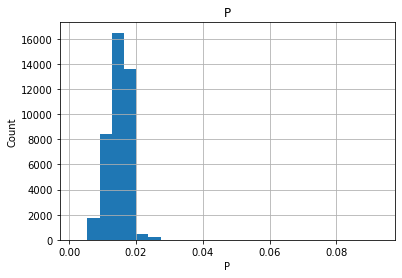

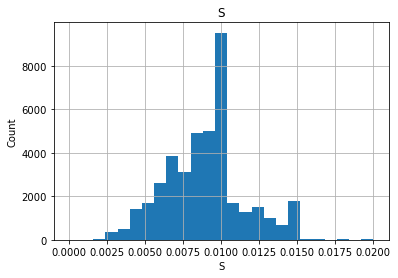

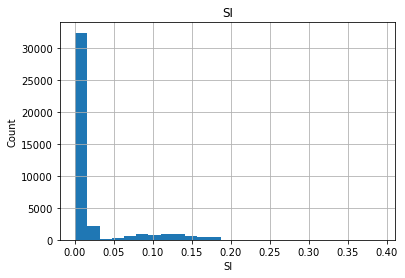

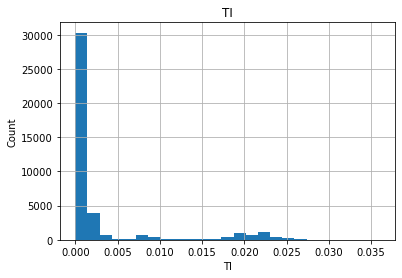

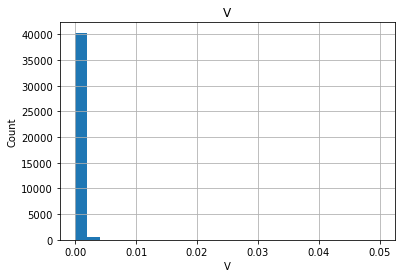

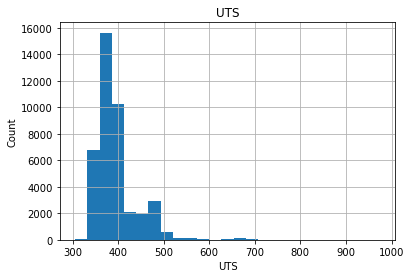

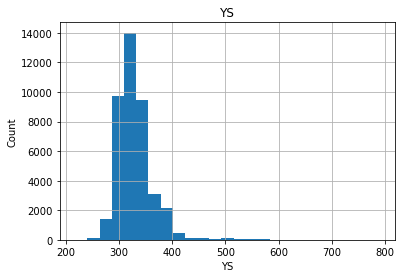

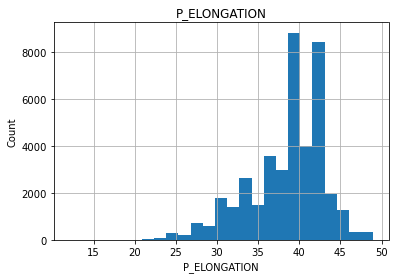

In [10]:
#  Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

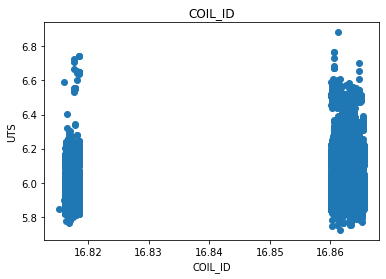

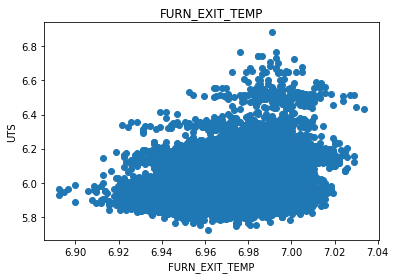

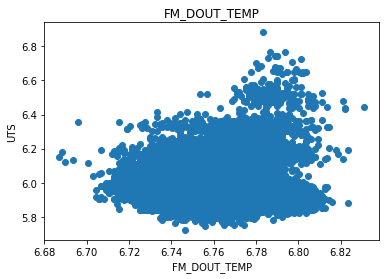

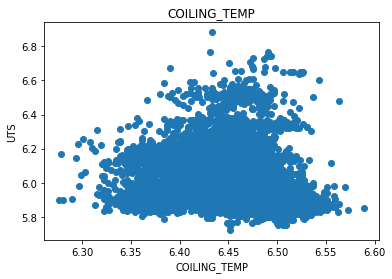

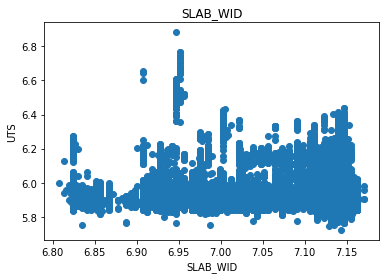

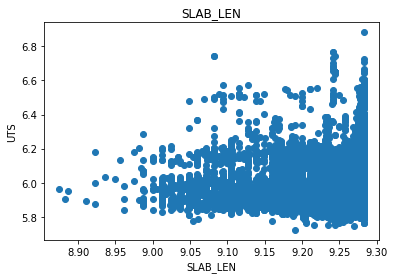

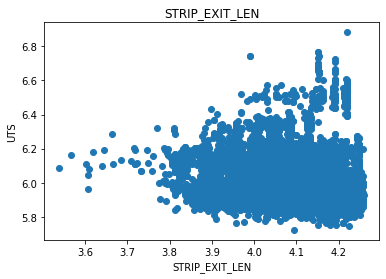

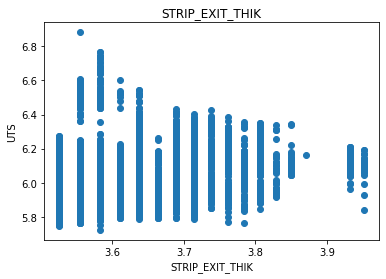

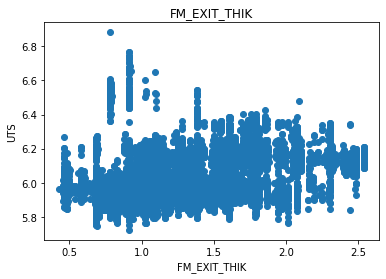

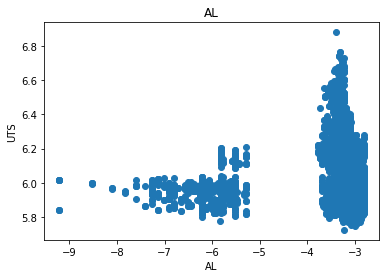

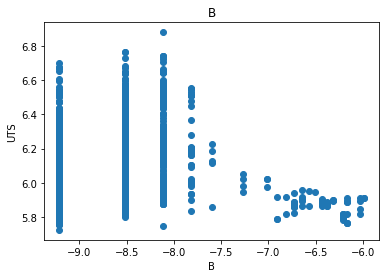

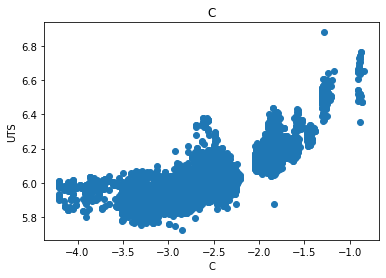

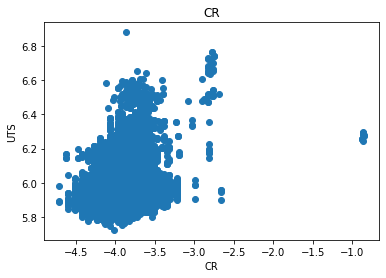

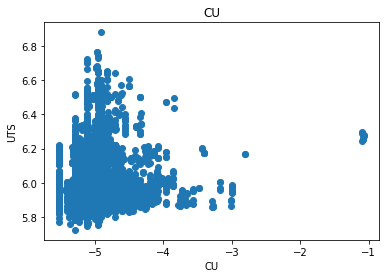

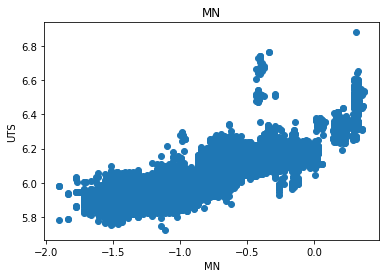

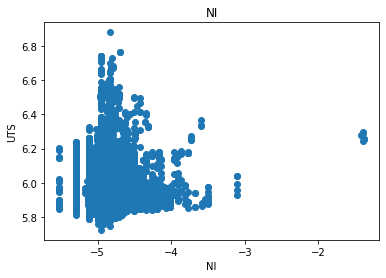

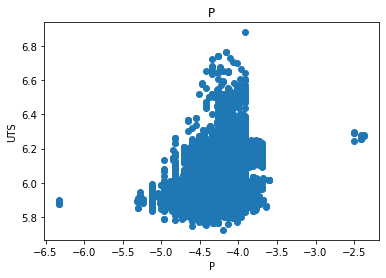

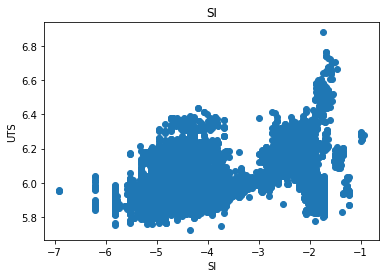

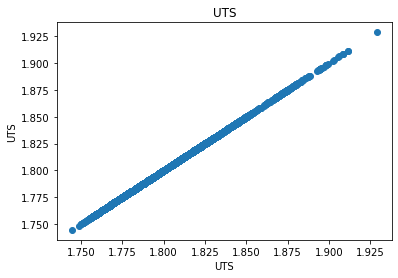

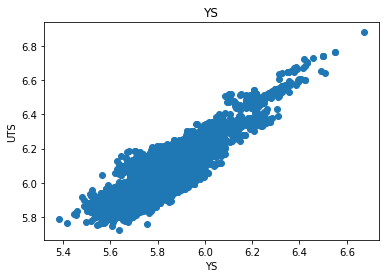

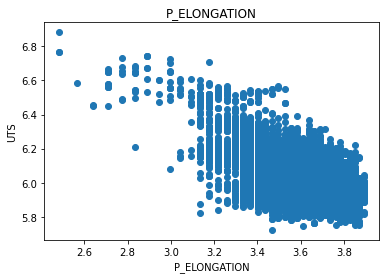

In [11]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['UTS']=np.log(data['UTS'])
        plt.scatter(data[feature],data['UTS'])
        plt.xlabel(feature)
        plt.ylabel('UTS')
        plt.title(feature)
        plt.show()

# Categorical Variables

In [12]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['GRADE', 'COIL_GEN_TIME']

In [13]:
dataset[categorical_features].head()

,GRADE,COIL_GEN_TIME
0,JVHGLD4AS0,8/10/2020 2:25
1,JVHGLD4AS0,9/14/2020 2:30
2,JVHCM30A00,9/14/2020 6:47
3,JVHST01C00,9/15/2020 11:55
4,JVHWT02A00,9/16/2020 1:14


In [14]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is GRADE and number of categories are 110
The feature is COIL_GEN_TIME and number of categories are 40959


In [15]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['UTS'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [16]:
dataset.head(100)

,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,20081459,JVHGLD4AS0,Rare_var,1081,869,680,1125,10750.0,69.81,34,...,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001,346,294,42
1,20097626,JVHGLD4AS0,Rare_var,1070,838,662,1245,10640.0,68.63,34,...,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001,365,299,42
2,20097722,Rare_var,Rare_var,1075,882,611,1040,10750.0,66.08,36,...,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001,730,575,21
3,20098318,JVHST01C00,Rare_var,1088,864,603,1260,9000.0,51.94,38,...,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001,495,397,30
4,20098589,JVHWT02A00,Rare_var,1061,848,650,1265,9811.0,61.23,35,...,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001,379,326,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20099556,JVHGLC4AS0,Rare_var,1017,839,641,1203,8750.0,57.28,34,...,0.0023,0.008,0.010,0.0064,0.008,0.001,0.001,366,327,41
96,20099558,JVHGLD4AS0,Rare_var,1025,858,678,940,10750.0,65.42,36,...,0.0031,0.008,0.016,0.0100,0.006,0.001,0.001,355,308,43
97,20099565,JVHGLD4AS0,Rare_var,1061,872,689,940,10750.0,67.29,35,...,0.0031,0.008,0.016,0.0100,0.006,0.001,0.001,352,303,44
98,20099570,JVHGLD4AS0,Rare_var,1054,871,686,940,10750.0,67.29,35,...,0.0036,0.008,0.015,0.0100,0.009,0.001,0.001,350,302,44


In [17]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['UTS'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [18]:
dataset.head(100)

,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,20081459,0,0,1081,869,680,1125,10750.0,69.81,34,...,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001,346,294,42
1,20097626,0,0,1070,838,662,1245,10640.0,68.63,34,...,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001,365,299,42
2,20097722,12,0,1075,882,611,1040,10750.0,66.08,36,...,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001,730,575,21
3,20098318,14,0,1088,864,603,1260,9000.0,51.94,38,...,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001,495,397,30
4,20098589,7,0,1061,848,650,1265,9811.0,61.23,35,...,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001,379,326,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20099556,1,0,1017,839,641,1203,8750.0,57.28,34,...,0.0023,0.008,0.010,0.0064,0.008,0.001,0.001,366,327,41
96,20099558,0,0,1025,858,678,940,10750.0,65.42,36,...,0.0031,0.008,0.016,0.0100,0.006,0.001,0.001,355,308,43
97,20099565,0,0,1061,872,689,940,10750.0,67.29,35,...,0.0031,0.008,0.016,0.0100,0.006,0.001,0.001,352,303,44
98,20099570,0,0,1054,871,686,940,10750.0,67.29,35,...,0.0036,0.008,0.015,0.0100,0.009,0.001,0.001,350,302,44


In [19]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['UTS','YS','P_ELONGATION']]

In [20]:
len(scaling_feature)

27

In [21]:
scaling_feature

['COIL_ID',
 'GRADE',
 'COIL_GEN_TIME',
 'FURN_EXIT_TEMP',
 'FM_DOUT_TEMP',
 'COILING_TEMP',
 'SLAB_WID',
 'SLAB_LEN',
 'STRIP_EXIT_LEN',
 'STRIP_EXIT_THIK',
 'FM_EXIT_THIK',
 'AL',
 'B',
 'C',
 'CA',
 'NB',
 'CR',
 'CU',
 'MN',
 'MO',
 'N',
 'NI',
 'P',
 'S',
 'SI',
 'TI',
 'V']

# Feature Scaling

In [22]:
feature_scale=[feature for feature in dataset.columns if feature not in ['UTS','YS','P_ELONGATION']]

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [24]:
scaler.transform(dataset[feature_scale])

array([[0.        , 0.        , 0.        , ..., 0.00769428, 0.02777778,
        0.02      ],
       [0.01564043, 0.        , 0.        , ..., 0.01538856, 0.02777778,
        0.02      ],
       [0.01573331, 0.75      , 0.        , ..., 0.41805591, 0.05555556,
        0.02      ],
       ...,
       [0.99994873, 0.4375    , 0.        , ..., 0.04103616, 0.02777778,
        0.02      ],
       [0.9999971 , 0.625     , 0.        , ..., 0.04360092, 0.02777778,
        0.02      ],
       [1.        , 0.875     , 0.        , ..., 0.35393691, 0.08333333,
        0.02      ]])

In [25]:
data = pd.concat([dataset[['UTS','YS','P_ELONGATION']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [26]:
data.head()

,UTS,YS,P_ELONGATION,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,...,CU,MN,MO,N,NI,P,S,SI,TI,V
0,346,294,42,0.000000,0.0000,0.0,0.644295,0.540323,0.758974,0.556962,...,0.008863,0.038462,0.05,0.3125,0.012136,0.177632,0.500,0.007694,0.027778,0.02
1,365,299,42,0.015640,0.0000,0.0,0.570470,0.290323,0.666667,0.860759,...,0.005908,0.061538,0.05,0.2750,0.012136,0.133772,0.500,0.015389,0.027778,0.02
2,730,575,21,0.015733,0.7500,0.0,0.604027,0.645161,0.405128,0.341772,...,0.005908,0.923077,0.05,0.8750,0.016181,0.144737,0.150,0.418056,0.055556,0.02
3,495,397,30,0.016310,0.8750,0.0,0.691275,0.500000,0.364103,0.898734,...,0.017725,0.461538,0.05,0.4375,0.016181,0.210526,0.655,0.251346,0.055556,0.02
4,379,326,41,0.016572,0.4375,0.0,0.510067,0.370968,0.605128,0.911392,...,0.002954,0.130769,0.05,0.4000,0.012136,0.144737,0.505,0.012824,0.027778,0.02


In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [29]:
## Capture the dependent feature
y_train=data[['UTS','YS','P_ELONGATION']]

In [30]:
## drop dependent feature from dataset
X_train=data.drop(['UTS','YS','P_ELONGATION'],axis=1)

In [31]:
X_train

,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,...,CU,MN,MO,N,NI,P,S,SI,TI,V
0,0.000000,0.0000,0.0,0.644295,0.540323,0.758974,0.556962,1.000000,0.973836,0.000000,...,0.008863,0.038462,0.05,0.3125,0.012136,0.177632,0.500,0.007694,0.027778,0.02
1,0.015640,0.0000,0.0,0.570470,0.290323,0.666667,0.860759,0.969444,0.941338,0.000000,...,0.005908,0.061538,0.05,0.2750,0.012136,0.133772,0.500,0.015389,0.027778,0.02
2,0.015733,0.7500,0.0,0.604027,0.645161,0.405128,0.341772,1.000000,0.871110,0.111111,...,0.005908,0.923077,0.05,0.8750,0.016181,0.144737,0.150,0.418056,0.055556,0.02
3,0.016310,0.8750,0.0,0.691275,0.500000,0.364103,0.898734,0.513889,0.481685,0.222222,...,0.017725,0.461538,0.05,0.4375,0.016181,0.210526,0.655,0.251346,0.055556,0.02
4,0.016572,0.4375,0.0,0.510067,0.370968,0.605128,0.911392,0.739167,0.737538,0.055556,...,0.002954,0.130769,0.05,0.4000,0.012136,0.144737,0.505,0.012824,0.027778,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40959,0.999947,0.4375,0.0,0.604027,0.548387,0.528205,0.924051,0.986111,0.966951,0.000000,...,0.005908,0.138462,0.05,0.3375,0.012136,0.111842,0.430,0.015389,0.027778,0.02
40960,0.999948,0.4375,0.0,0.543624,0.612903,0.579487,0.924051,0.986111,0.966951,0.000000,...,0.005908,0.138462,0.05,0.4250,0.016181,0.100877,0.315,0.035907,0.222222,0.02
40961,0.999949,0.4375,0.0,0.644295,0.572581,0.528205,0.924051,0.986111,0.966951,0.000000,...,0.005908,0.146154,0.05,0.4000,0.012136,0.100877,0.225,0.041036,0.027778,0.02
40962,0.999997,0.6250,0.0,0.604027,0.741935,0.615385,0.924051,0.986111,0.765354,0.222222,...,0.005908,0.246154,0.05,0.4250,0.012136,0.144737,0.320,0.043601,0.027778,0.02


In [32]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

In [33]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.1, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.1, random_state=0))

In [34]:
feature_sel_model.get_support()

array([ True,  True, False, False,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True,  True, False, False,
        True, False,  True, False, False, False,  True,  True, False])

In [35]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 27
selected features: 14


In [36]:
selected_feat

Index(['COIL_ID', 'GRADE', 'FM_DOUT_TEMP', 'COILING_TEMP', 'SLAB_WID',
       'STRIP_EXIT_LEN', 'FM_EXIT_THIK', 'C', 'CA', 'NB', 'MN', 'N', 'SI',
       'TI'],
      dtype='object')

In [37]:
X_train=X_train[selected_feat]

In [38]:
X_train

,COIL_ID,GRADE,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,STRIP_EXIT_LEN,FM_EXIT_THIK,C,CA,NB,MN,N,SI,TI
0,0.000000,0.0000,0.540323,0.758974,0.556962,0.973836,0.040468,0.044611,0.075,0.019685,0.038462,0.3125,0.007694,0.027778
1,0.015640,0.0000,0.290323,0.666667,0.860759,0.941338,0.045863,0.056667,0.025,0.019685,0.061538,0.2750,0.015389,0.027778
2,0.015733,0.7500,0.645161,0.405128,0.341772,0.871110,0.085432,0.641186,0.700,0.019685,0.923077,0.8750,0.418056,0.055556
3,0.016310,0.8750,0.500000,0.364103,0.898734,0.481685,0.310252,0.338558,0.050,0.019685,0.461538,0.4375,0.251346,0.055556
4,0.016572,0.4375,0.370968,0.605128,0.911392,0.737538,0.069245,0.110924,0.025,0.019685,0.130769,0.4000,0.012824,0.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40959,0.999947,0.4375,0.548387,0.528205,0.924051,0.966951,0.040468,0.103689,0.025,0.019685,0.138462,0.3375,0.015389,0.027778
40960,0.999948,0.4375,0.612903,0.579487,0.924051,0.966951,0.040468,0.125392,0.025,0.019685,0.138462,0.4250,0.035907,0.222222
40961,0.999949,0.4375,0.572581,0.528205,0.924051,0.966951,0.040468,0.120569,0.025,0.019685,0.146154,0.4000,0.041036,0.027778
40962,0.999997,0.6250,0.741935,0.615385,0.924051,0.765354,0.381295,0.212202,0.025,0.019685,0.246154,0.4250,0.043601,0.027778


In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
pip install Boruta

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

In [42]:
data

,UTS,YS,P_ELONGATION,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,...,CU,MN,MO,N,NI,P,S,SI,TI,V
0,346,294,42,0.000000,0.0000,0.0,0.644295,0.540323,0.758974,0.556962,...,0.008863,0.038462,0.05,0.3125,0.012136,0.177632,0.500,0.007694,0.027778,0.02
1,365,299,42,0.015640,0.0000,0.0,0.570470,0.290323,0.666667,0.860759,...,0.005908,0.061538,0.05,0.2750,0.012136,0.133772,0.500,0.015389,0.027778,0.02
2,730,575,21,0.015733,0.7500,0.0,0.604027,0.645161,0.405128,0.341772,...,0.005908,0.923077,0.05,0.8750,0.016181,0.144737,0.150,0.418056,0.055556,0.02
3,495,397,30,0.016310,0.8750,0.0,0.691275,0.500000,0.364103,0.898734,...,0.017725,0.461538,0.05,0.4375,0.016181,0.210526,0.655,0.251346,0.055556,0.02
4,379,326,41,0.016572,0.4375,0.0,0.510067,0.370968,0.605128,0.911392,...,0.002954,0.130769,0.05,0.4000,0.012136,0.144737,0.505,0.012824,0.027778,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40959,398,352,42,0.999947,0.4375,0.0,0.604027,0.548387,0.528205,0.924051,...,0.005908,0.138462,0.05,0.3375,0.012136,0.111842,0.430,0.015389,0.027778,0.02
40960,405,347,35,0.999948,0.4375,0.0,0.543624,0.612903,0.579487,0.924051,...,0.005908,0.138462,0.05,0.4250,0.016181,0.100877,0.315,0.035907,0.222222,0.02
40961,389,330,39,0.999949,0.4375,0.0,0.644295,0.572581,0.528205,0.924051,...,0.005908,0.146154,0.05,0.4000,0.012136,0.100877,0.225,0.041036,0.027778,0.02
40962,405,311,37,0.999997,0.6250,0.0,0.604027,0.741935,0.615385,0.924051,...,0.005908,0.246154,0.05,0.4250,0.012136,0.144737,0.320,0.043601,0.027778,0.02


In [43]:
X=data.drop(['COIL_ID','UTS','YS','P_ELONGATION'],axis=1)

X

,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,FM_EXIT_THIK,...,CU,MN,MO,N,NI,P,S,SI,TI,V
0,0.0000,0.0,0.644295,0.540323,0.758974,0.556962,1.000000,0.973836,0.000000,0.040468,...,0.008863,0.038462,0.05,0.3125,0.012136,0.177632,0.500,0.007694,0.027778,0.02
1,0.0000,0.0,0.570470,0.290323,0.666667,0.860759,0.969444,0.941338,0.000000,0.045863,...,0.005908,0.061538,0.05,0.2750,0.012136,0.133772,0.500,0.015389,0.027778,0.02
2,0.7500,0.0,0.604027,0.645161,0.405128,0.341772,1.000000,0.871110,0.111111,0.085432,...,0.005908,0.923077,0.05,0.8750,0.016181,0.144737,0.150,0.418056,0.055556,0.02
3,0.8750,0.0,0.691275,0.500000,0.364103,0.898734,0.513889,0.481685,0.222222,0.310252,...,0.017725,0.461538,0.05,0.4375,0.016181,0.210526,0.655,0.251346,0.055556,0.02
4,0.4375,0.0,0.510067,0.370968,0.605128,0.911392,0.739167,0.737538,0.055556,0.069245,...,0.002954,0.130769,0.05,0.4000,0.012136,0.144737,0.505,0.012824,0.027778,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40959,0.4375,0.0,0.604027,0.548387,0.528205,0.924051,0.986111,0.966951,0.000000,0.040468,...,0.005908,0.138462,0.05,0.3375,0.012136,0.111842,0.430,0.015389,0.027778,0.02
40960,0.4375,0.0,0.543624,0.612903,0.579487,0.924051,0.986111,0.966951,0.000000,0.040468,...,0.005908,0.138462,0.05,0.4250,0.016181,0.100877,0.315,0.035907,0.222222,0.02
40961,0.4375,0.0,0.644295,0.572581,0.528205,0.924051,0.986111,0.966951,0.000000,0.040468,...,0.005908,0.146154,0.05,0.4000,0.012136,0.100877,0.225,0.041036,0.027778,0.02
40962,0.6250,0.0,0.604027,0.741935,0.615385,0.924051,0.986111,0.765354,0.222222,0.381295,...,0.005908,0.246154,0.05,0.4250,0.012136,0.144737,0.320,0.043601,0.027778,0.02


In [44]:
y=data[['UTS'
       ]].values
y

array([[346],
       [365],
       [730],
       ...,
       [389],
       [405],
       [486]], dtype=int64)

In [45]:
y = y.ravel()

In [46]:
model= RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

In [47]:
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=10,  
    random_state=0,
)

In [48]:
feat_selector.fit(np.array(X), np.array(y))

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	7
Tentative: 	8
Rejected: 	11
Iteration: 	9 / 10
Confirmed: 	7
Tentative: 	8
Rejected: 	11


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	7
Tentative: 	2
Rejected: 	11


BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=109,
                                         random_state=RandomState(MT19937) at 0x7ED4A15440),
         max_iter=10, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7ED4A15440, verbose=2)

In [49]:
import numpy as np

In [50]:
# print support and ranking for each feature
print("\n------Support and Ranking for each feature------\n")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i], "✔️")
    else:
        print("Doesn't pass the test: ",
              X.columns[i], " - Ranking: ", feat_selector.ranking_[i], "X")


------Support and Ranking for each feature------

Passes the test:  GRADE  - Ranking:  1 ✔️
Doesn't pass the test:  COIL_GEN_TIME  - Ranking:  18 X
Doesn't pass the test:  FURN_EXIT_TEMP  - Ranking:  13 X
Doesn't pass the test:  FM_DOUT_TEMP  - Ranking:  2 X
Doesn't pass the test:  COILING_TEMP  - Ranking:  2 X
Doesn't pass the test:  SLAB_WID  - Ranking:  13 X
Doesn't pass the test:  SLAB_LEN  - Ranking:  15 X
Doesn't pass the test:  STRIP_EXIT_LEN  - Ranking:  8 X
Doesn't pass the test:  STRIP_EXIT_THIK  - Ranking:  3 X
Passes the test:  FM_EXIT_THIK  - Ranking:  1 ✔️
Doesn't pass the test:  AL  - Ranking:  10 X
Doesn't pass the test:  B  - Ranking:  17 X
Passes the test:  C  - Ranking:  1 ✔️
Doesn't pass the test:  CA  - Ranking:  6 X
Passes the test:  NB  - Ranking:  1 ✔️
Passes the test:  CR  - Ranking:  1 ✔️
Doesn't pass the test:  CU  - Ranking:  5 X
Passes the test:  MN  - Ranking:  1 ✔️
Doesn't pass the test:  MO  - Ranking:  14 X
Doesn't pass the test:  N  - Ranking:  7 X
Do

In [51]:
# features selected by Boruta
X_filtered = feat_selector.transform(np.array(X))


In [52]:
print("\n------Selected Features------\n")
(print(X_filtered))


------Selected Features------

[[0.         0.04046763 0.04461056 ... 0.02159309 0.03846154 0.00769428]
 [0.         0.04586331 0.05666747 ... 0.01679463 0.06153846 0.01538856]
 [0.75       0.08543165 0.6411864  ... 0.02639155 0.92307692 0.41805591]
 ...
 [0.4375     0.04046763 0.12056909 ... 0.01439539 0.14615385 0.04103616]
 [0.625      0.38129496 0.21220159 ... 0.02399232 0.24615385 0.04360092]
 [0.875      0.56115108 0.36170726 ... 0.02399232 0.45384615 0.35393691]]


In [53]:
pd.DataFrame(X_filtered)

,0,1,2,3,4,5,6
0,0.0000,0.040468,0.044611,0.019685,0.021593,0.038462,0.007694
1,0.0000,0.045863,0.056667,0.019685,0.016795,0.061538,0.015389
2,0.7500,0.085432,0.641186,0.019685,0.026392,0.923077,0.418056
3,0.8750,0.310252,0.338558,0.019685,0.031190,0.461538,0.251346
4,0.4375,0.069245,0.110924,0.019685,0.014395,0.130769,0.012824
...,...,...,...,...,...,...,...
40959,0.4375,0.040468,0.103689,0.019685,0.009597,0.138462,0.015389
40960,0.4375,0.040468,0.125392,0.019685,0.019194,0.138462,0.035907
40961,0.4375,0.040468,0.120569,0.019685,0.014395,0.146154,0.041036
40962,0.6250,0.381295,0.212202,0.019685,0.023992,0.246154,0.043601


In [54]:
pip install BorutaShap

In [55]:
from BorutaShap import BorutaShap
# Creates a BorutaShap selector for regression
selector = BorutaShap(importance_measure = 'shap', classification = False)

In [56]:
# Fits the selector

X=data.drop(['COIL_ID','UTS','YS','P_ELONGATION'],axis=1)

X


,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,FM_EXIT_THIK,...,CU,MN,MO,N,NI,P,S,SI,TI,V
0,0.0000,0.0,0.644295,0.540323,0.758974,0.556962,1.000000,0.973836,0.000000,0.040468,...,0.008863,0.038462,0.05,0.3125,0.012136,0.177632,0.500,0.007694,0.027778,0.02
1,0.0000,0.0,0.570470,0.290323,0.666667,0.860759,0.969444,0.941338,0.000000,0.045863,...,0.005908,0.061538,0.05,0.2750,0.012136,0.133772,0.500,0.015389,0.027778,0.02
2,0.7500,0.0,0.604027,0.645161,0.405128,0.341772,1.000000,0.871110,0.111111,0.085432,...,0.005908,0.923077,0.05,0.8750,0.016181,0.144737,0.150,0.418056,0.055556,0.02
3,0.8750,0.0,0.691275,0.500000,0.364103,0.898734,0.513889,0.481685,0.222222,0.310252,...,0.017725,0.461538,0.05,0.4375,0.016181,0.210526,0.655,0.251346,0.055556,0.02
4,0.4375,0.0,0.510067,0.370968,0.605128,0.911392,0.739167,0.737538,0.055556,0.069245,...,0.002954,0.130769,0.05,0.4000,0.012136,0.144737,0.505,0.012824,0.027778,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40959,0.4375,0.0,0.604027,0.548387,0.528205,0.924051,0.986111,0.966951,0.000000,0.040468,...,0.005908,0.138462,0.05,0.3375,0.012136,0.111842,0.430,0.015389,0.027778,0.02
40960,0.4375,0.0,0.543624,0.612903,0.579487,0.924051,0.986111,0.966951,0.000000,0.040468,...,0.005908,0.138462,0.05,0.4250,0.016181,0.100877,0.315,0.035907,0.222222,0.02
40961,0.4375,0.0,0.644295,0.572581,0.528205,0.924051,0.986111,0.966951,0.000000,0.040468,...,0.005908,0.146154,0.05,0.4000,0.012136,0.100877,0.225,0.041036,0.027778,0.02
40962,0.6250,0.0,0.604027,0.741935,0.615385,0.924051,0.986111,0.765354,0.222222,0.381295,...,0.005908,0.246154,0.05,0.4250,0.012136,0.144737,0.320,0.043601,0.027778,0.02


In [57]:
Y=data[['UTS'
       ]].values
Y

array([[346],
       [365],
       [730],
       ...,
       [389],
       [405],
       [486]], dtype=int64)

In [ ]:
selector.fit(X , Y , n_trials = 100, sample = False, verbose = True)
# n_trials -> number of iterations for Boruta algorithm
# sample -> samples the data so it goes faster

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# Display features to be removed
features_to_remove = selector.features_to_remove
print(features_to_remove)

In [ ]:
# Removes them
X_train_boruta_shap = X_train.drop(columns = features_to_remove)
X_test_boruta_shap = X_test.drop(columns = features_to_remove)